In [6]:
#!/usr/bin/python
# -*- coding: iso-8859-1 -*-
# ----------------------------------------------------------
# tentalista: tenta manipular uma lista como se ela fosse
# um vetor matemático.
# ----------------------------------------------------------
from __future__ import print_function
uu = [1,2] # lista com dois elementos
vv = [3,4] # outra lista com dois elementos
ww = uu + vv # soma para ver no que dá
kk = 3*uu # multiplica pelo escalar 3 para ver no
# que dá
print('ww = ', ww) ;
print('kk = ',kk) ;

ww =  [1, 2, 3, 4]
kk =  [1, 2, 1, 2, 1, 2]


In [7]:
#!/usr/bin/python
# -*- coding: iso-8859-1 -*-
# ----------------------------------------------------------
# tentaarray: usa arrays, em vez de listas
# ----------------------------------------------------------
from __future__ import print_function
from numpy import array
uu = array([1,2]) # lista com dois elementos
vv = array([3,4]) # outra lista com dois elementos
ww = uu + vv # soma para ver no que dá
kk = 3*uu # multiplica pelo escalar 3 para ver no
# que dá
print('ww = ', ww) ;
print('kk = ',kk) ;

ww =  [4 6]
kk =  [3 6]


erro relativo médio =    0.000004   0.000004


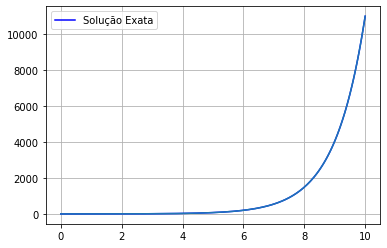

In [10]:
#!/usr/bin/python
# -*- coding: iso-8859-1 -*-
# ----------------------------------------------------------------------------------
# Método de Runge Kutta de 4ªordem: resolve o sistema de duas equações diferenciais
#
# y(1):du1/dx = u2,
# y(0):du2/dx = u1,
#
# usando o método de Runge-Kutta de ordem 4
#   u1(x) = k1e^{-x}+k2e^{x}  Se k1=k2=0.5, então y1 =cosh(x)
#   u2(x) = -k1e^{-x} +k2e^{x} Se k1=0.5 e k2=-0.5, então y1 =senh(x)
# ----------------------------------------------------------------------------------
from __future__ import print_function
from numpy import array
h = 0.1 # passo em x
x = [0.0] # x inicial
y = [array([1.0,0.0])] # y inicial
n = int(10/h) # número de passos
from math import sinh, cosh

def ff(x,y):
    return array([y[1],y[0]])
def rk4(x,y,h,ff): #rk4 implementa um passo do método de Runge-Kutta de ordem 4   
    k1 = h*ff(x,y)
    k2 = h*ff(x+h/2,y+k1/2)
    k3 = h*ff(x+h/2,y+k2/2)
    k4 = h*ff(x+h,y+k3)
    yn = y + k1/6.0 + k2/3.0 + k3/3.0 + k4/6.0
    return yn
    
for i in range(0,n): # loop da solução numérica
        xn = (i+1)*h
        yn = rk4(x[i],y[i],h,ff)
        x.append(xn)
        y.append(yn)
    
erro0 = 0.0 # calcula o erro relativo médio
erro1 = 0.0

for i in range(1,n+1):
    yana0 = cosh(x[i])
    yana1 = sinh(x[i])
    erro0 += abs( (y[i][0] - yana0)/yana0 )
    erro1 += abs( (y[i][1] - yana1)/yana1 )
    
erro0 /= n
erro1 /= n

print ( 'erro relativo médio = ', '%10.6f %10.6f' % (erro0,erro1) )
fou = open('rungek4v.out','wt')
for i in range(0,n+1): # imprime o arquivo de saída
        fou.write( '%12.6f %12.6f %12.6f\n' % (x[i],y[i][0],y[i][1]) )
fou.close()

####################################################
import pylab as plt
import numpy as np
#Solução Exata
#X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
X = np.linspace(0, 10, 256, endpoint=True)
C, S = np.cosh(X), np.sinh(X)
plt.grid(True)
pl.plot(X, 0.5*C+0.5*S,'blue', label='Solução Exata')
pl.plot(X, S)
plt.legend()
pl.show()
####################################################



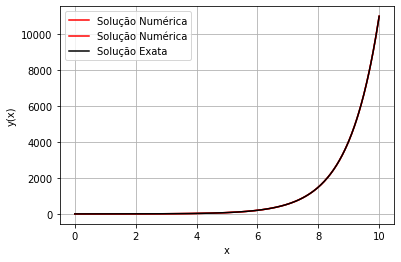

In [11]:
#Comparação entre solução exata e solução numérica
import pylab as plt
pl.plot(x,y,'red',label='Solução Numérica')
pl.plot(X, 0.5*C+0.5*S, 'black', label='Solução Exata')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
plt.legend()
#plt.figure(figsize=(15, 9))
plt.show()